<a href="https://colab.research.google.com/github/ajinkyamorade/Bank-Marketing-Effectiveness-Prediction/blob/main/Bank_Marketing_Effectiveness_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting the effectiveness of bank marketing campaigns </u></b>

## <b> Problem Description </b>

### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe a term deposit (variable y).


## <b> Data Description </b>

## <b>Input variables: </b>
### <b> Bank Client data: </b>

* ### age (numeric)
* ### job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* ### marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* ### education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* ### default: has credit in default? (categorical: 'no','yes','unknown')
* ### housing: has housing loan? (categorical: 'no','yes','unknown')
* ### loan: has personal loan? (categorical: 'no','yes','unknown')

### <b> Related with the last contact of the current campaign:</b>
* ### contact: contact communication type (categorical: 'cellular','telephone')
* ### month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* ### day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* ### duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

### <b>Other attributes: </b>
* ### campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* ### pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* ### previous: number of contacts performed before this campaign and for this client (numeric)
* ### poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')


### <b>Output variable (desired target):</b>
* ### y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Reading the CSV file
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Capstone Project/Bank Marketing Effectiveness Prediction/Data & Resources/bank-full.csv",sep =';')

# EDA

In [4]:
#number of rows and columns
df.shape

(45211, 17)

In [5]:
#first five rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
#last five rows
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [7]:
#romdom five rows
df.sample(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
14221,35,admin.,married,secondary,no,-203,yes,no,cellular,11,jul,1649,2,-1,0,unknown,yes
27717,38,management,divorced,tertiary,no,0,yes,yes,cellular,4,dec,18,1,-1,0,unknown,no
33633,44,management,single,secondary,no,109,yes,no,cellular,20,apr,101,4,328,3,failure,no
10371,43,blue-collar,married,primary,no,0,no,no,unknown,12,jun,30,1,-1,0,unknown,no
17032,29,services,single,secondary,no,-251,no,no,cellular,25,jul,98,1,-1,0,unknown,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
#looking for null values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

There are no null values in the dataset.

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
#piechart for percentage of number of subscribers and non-subscribers for term deposit(Traget Variable)
plt.figure(figsize=(7,5), dpi=100)
proportion = df1['y'].value_counts()
labels = ['Not-Subscribed a term deposit','Subscribed a term deposit']
plt.title('Proportion of Subscribed & Not Subscribed term Deposit')
plt.pie(proportion, explode=(0,0.02),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#98ff98','#ffcc99'])
plt.show()


NameError: ignored

<Figure size 700x500 with 0 Axes>

We can see from the above plot that the dataset is imbalanced, where the number 

of non-Subscribed class is close to 8 times the number of Subscribed Class.

## **2.Explore the Categorical Features**

In [12]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [13]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


**there are 9 categorical features**


**feature job and month has highest number of categorical values**

# **3.Find Categorical Feature Distribution**

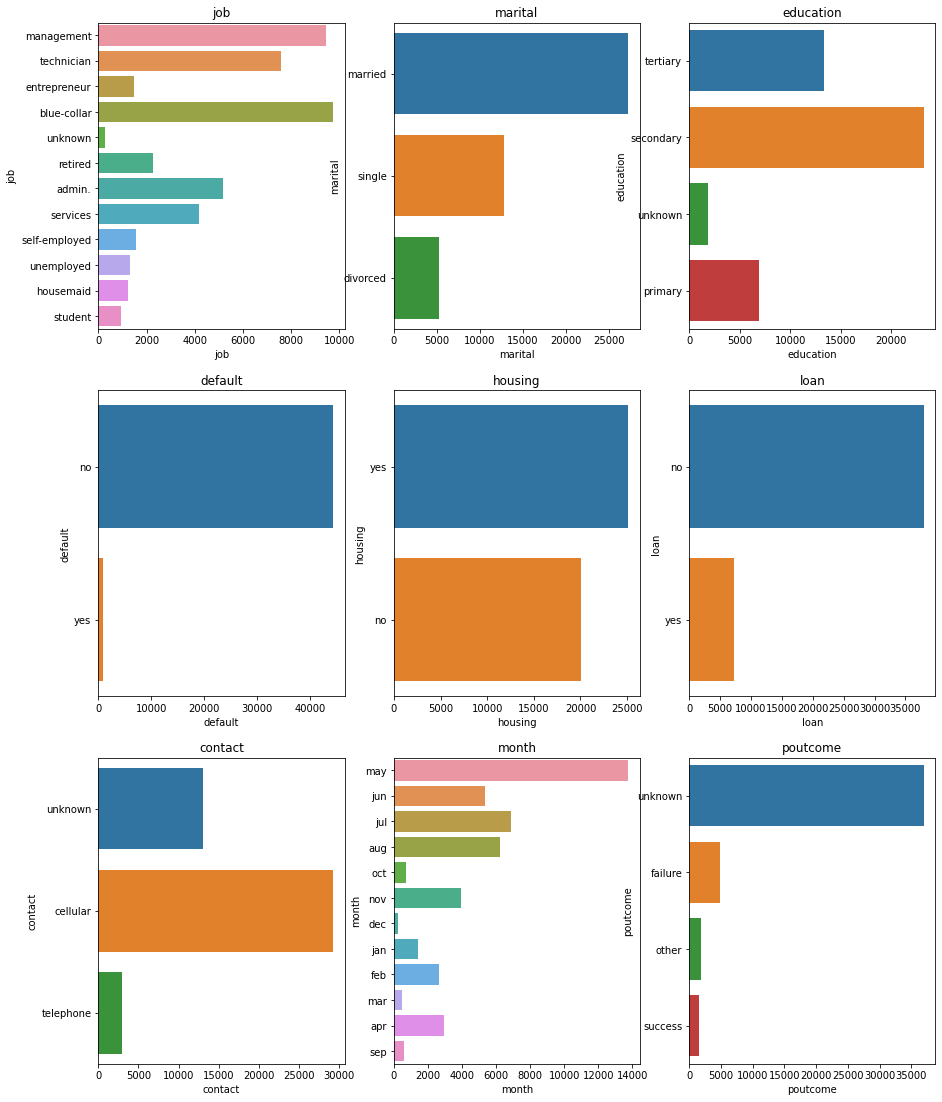

In [14]:
#check count based on categorical features
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

client with job type as management records are high in 
given dataset and housemaid are very less

client who married are high in records in given dataset and divorced are less

client whoes education background is secondary are in high numbers in given dataset

defualt feature seems to be does not play importand role as it has value of no at high ratio to value yes which can drop

data in month of may is high and less in dec




**4.Relationship between Categorical Features and Label**

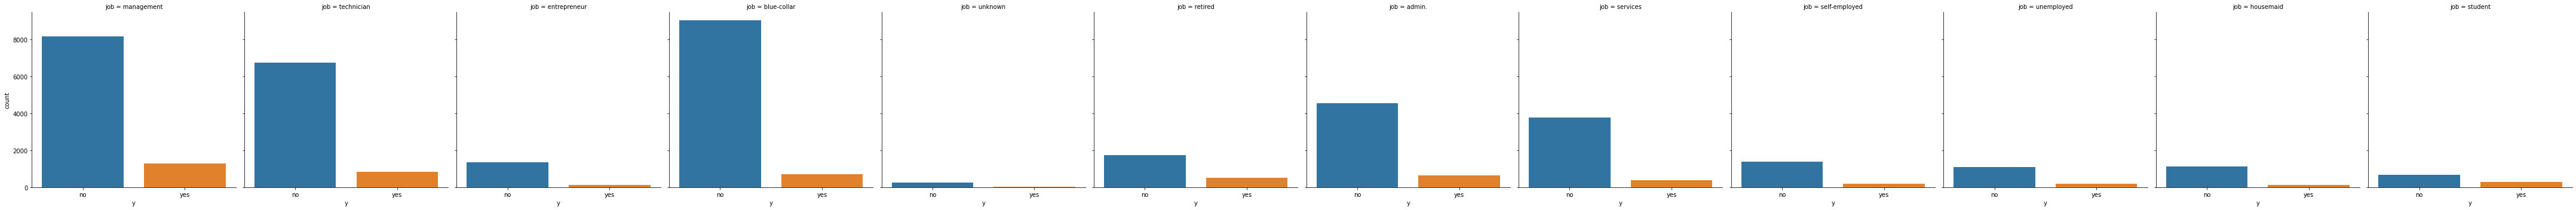

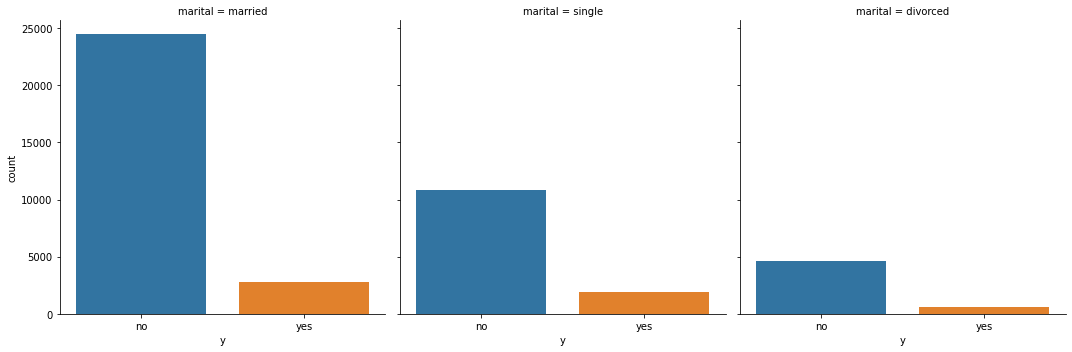

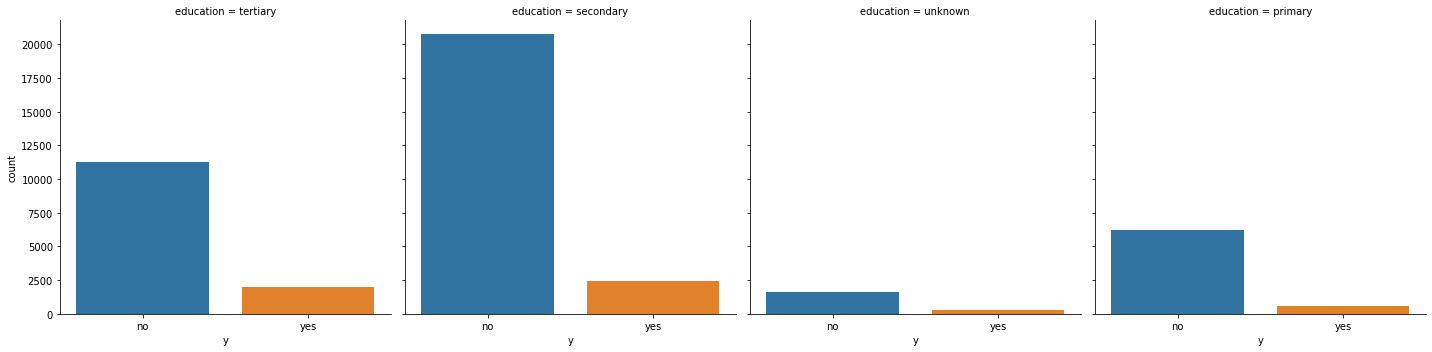

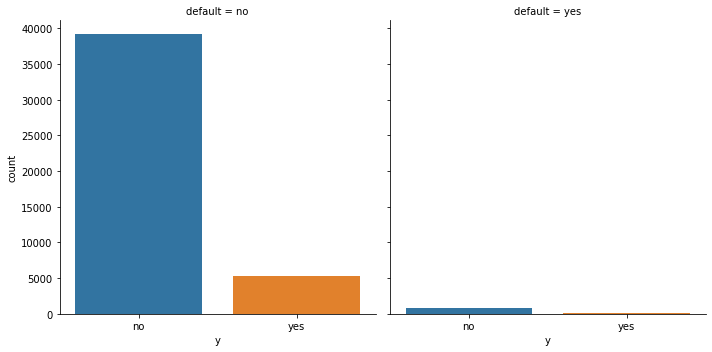

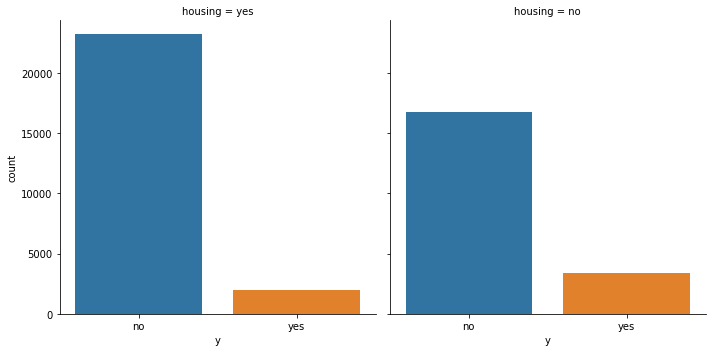

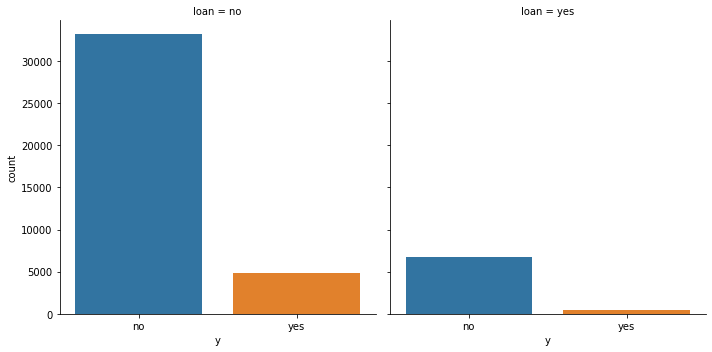

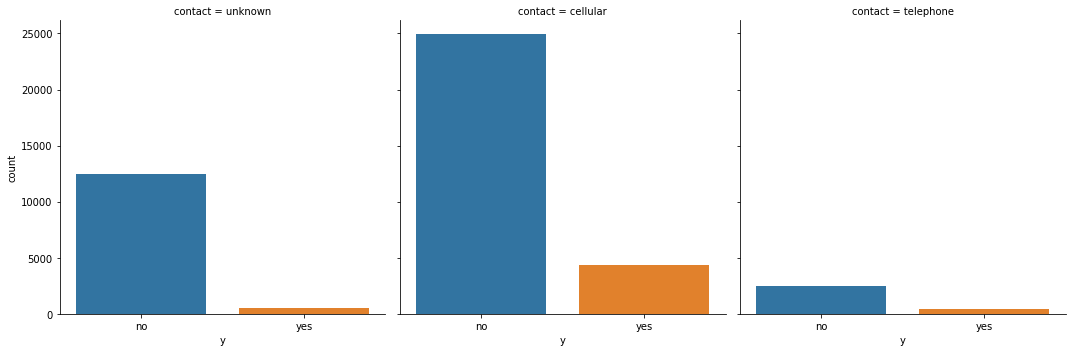

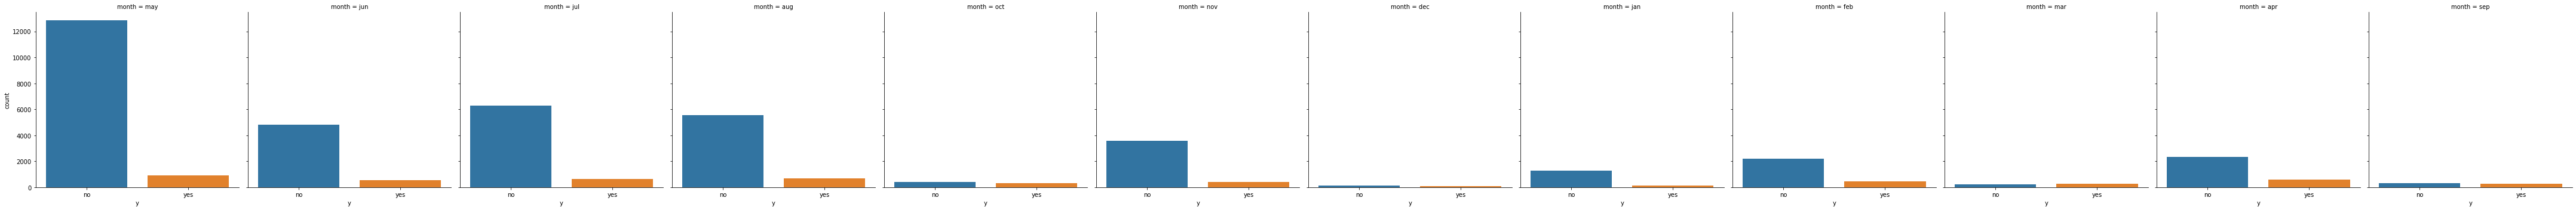

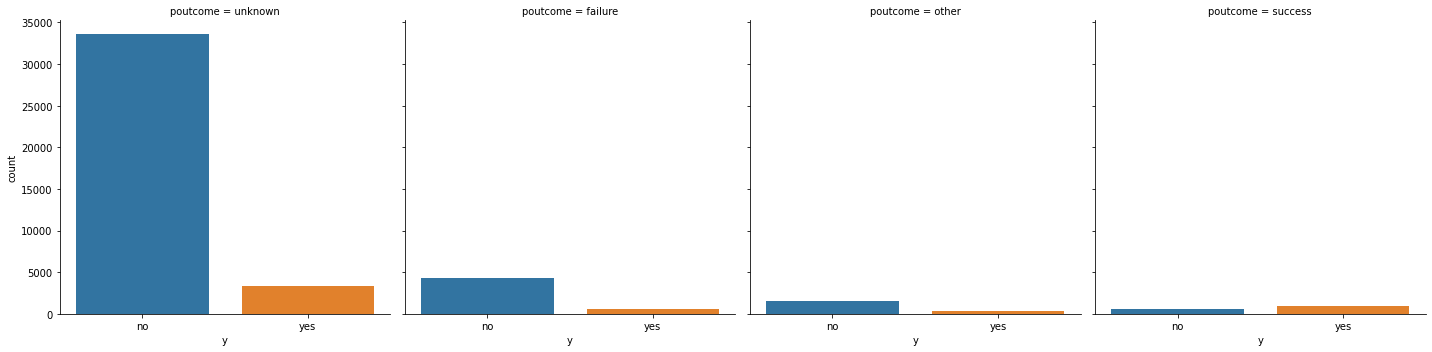

In [15]:
#check target label split over categorical features
#Find out the relationship between categorical variable and dependent variable

for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)

plt.show()

retired client has high interest on deposit

client who has housing loan seems to be not interested much on deposit

if pre campagin outcome that is poutcome=success then, there is high chance of client to show interest on deposit

in month of March, September, October and December, client show high interest to deposit

in month of may, records are high but client interst ratio is very less

In [16]:
#Check target label split over categorical features and find the count
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

**5.Explore the Numerical Features**

In [17]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['y']))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


there are 7 numerical features

**6.Find Discrete Numerical Features**

In [18]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 0


there is **no Discrete** Variables in give dataset

**7.Find Continous Numerical Features**

In [19]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['y']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 7


there are 7 continuous numerical features

In [20]:
#making a copy of the original dataset
df1=df.copy()

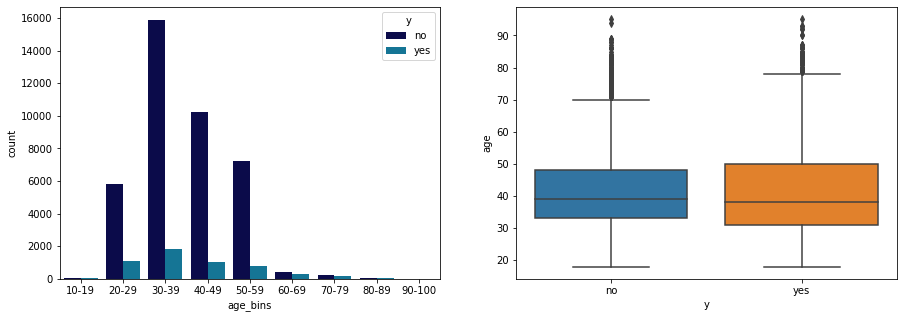

In [21]:
#plot for 'age' variable
df1['age_bins'] = pd.cut(x=df1['age'], bins=[10,20,30,40,50,60,70,80,90,100],labels=['10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'])

fig, axes = plt.subplots(1, 2,figsize = (15,5))
sns.countplot(x='age_bins',data=df1, palette='ocean',hue='y',ax = axes[0])
sns.boxplot(x=df1['y'],y=df1['age'],ax = axes[1]);

Majority of the customers are of the age group 30-39. Followed by 40-49 and 50-59.

The box plot for both the subscribed and not-subscribed customers looks the same.

In No class, outliers are present above age 70 and for Yes class, outliers are present above age 75.

there are 7 continuous numerical features

**8.Distribution of Continous Numerical Features**

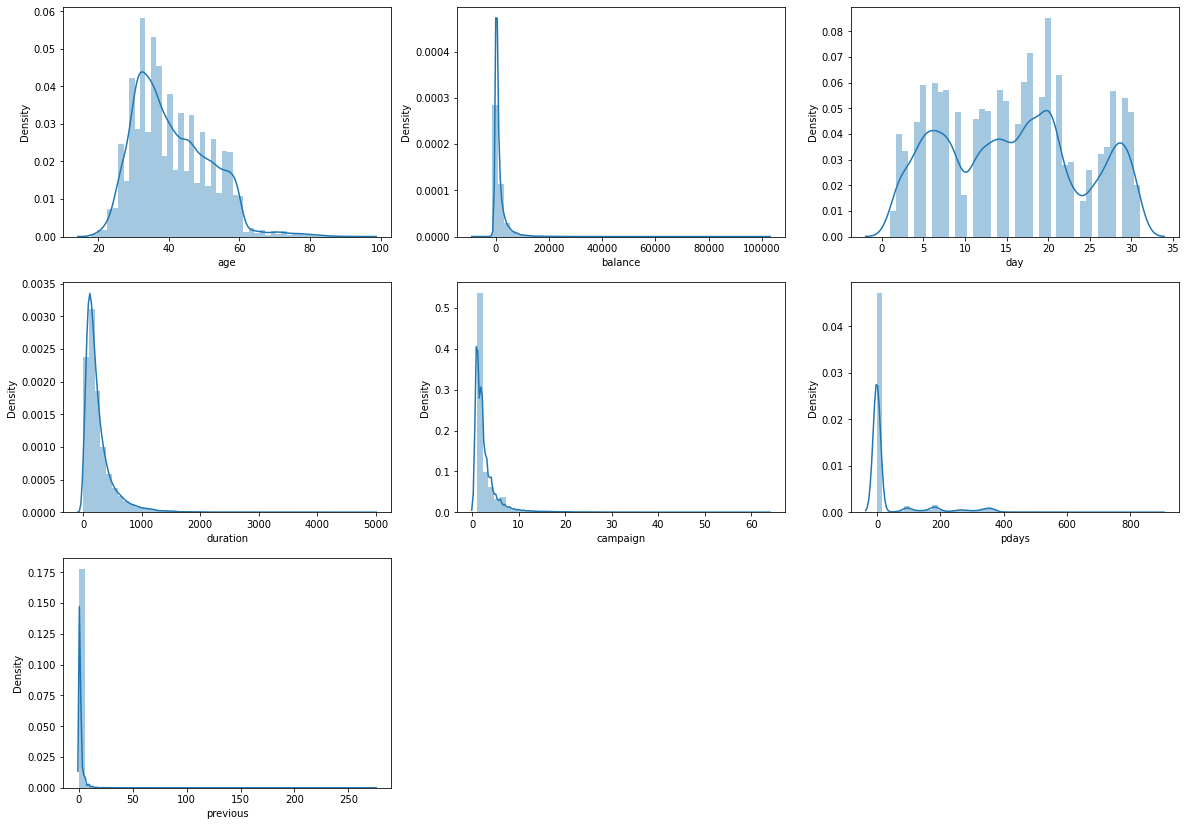

In [22]:
#plot a univariate distribution of continues observations
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

it seems age, days distributed normally

balance, duration, compaign, pdays and previous heavely skewed towards left and seems to be have some outliers.

 **9.Relation between Continous numerical Features and Labels**

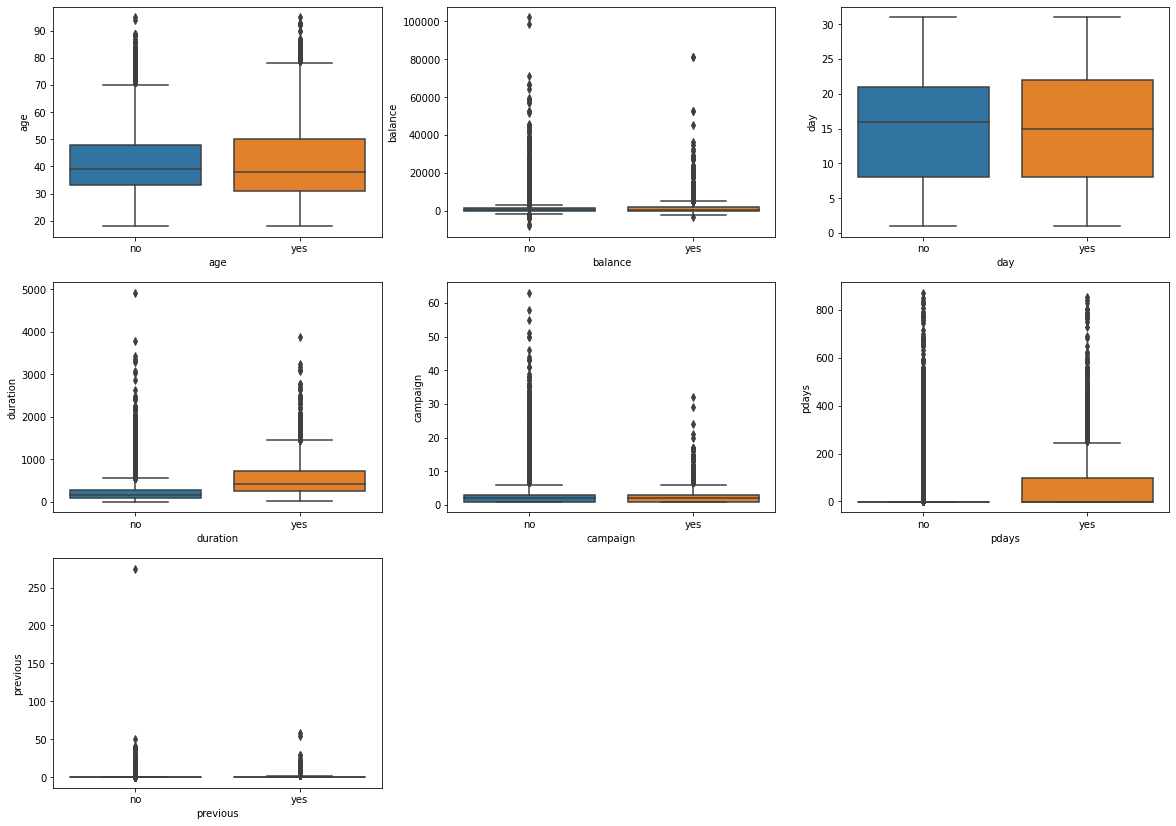

In [23]:
#boxplot to show target distribution with respect numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

client shows interest on deposit who had discussion for longer duration

**10.Find Outliers in numerical features**

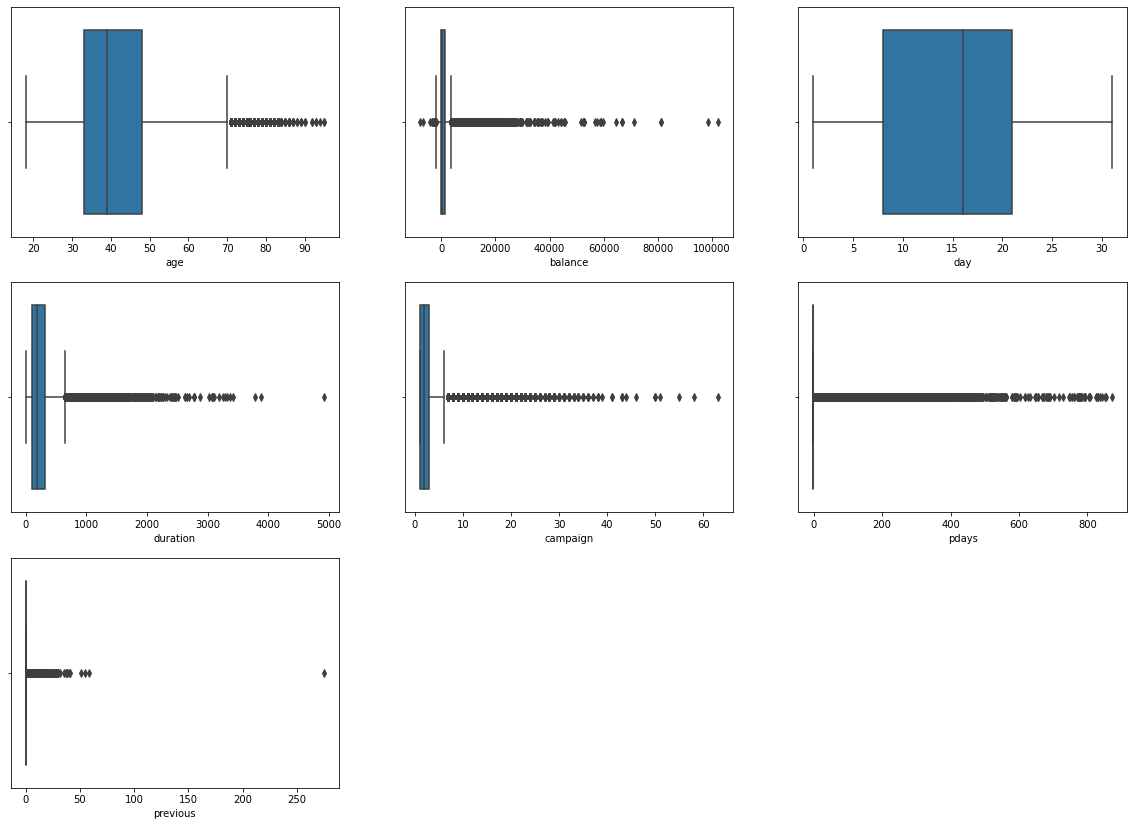

In [24]:
#boxplot on numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

age, balance, duration, compaign, pdays and previous has some outliers

**11.Explore the Correlation between numerical features**

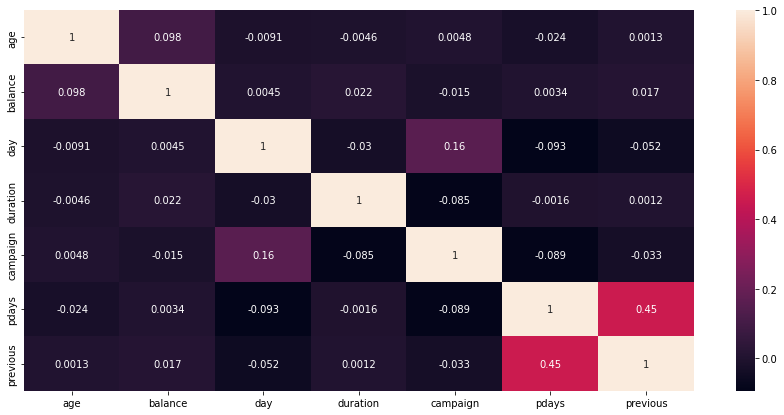

In [25]:
## Checking for correlation
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

it seems no feature is heavily correlated with other features

In [26]:
# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df):
  vif = pd.DataFrame()
  vif['Variables'] = df.columns
  vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
  return (vif)

In [27]:
calc_vif(df[[i for i in df.describe().columns if i not in ['y']]])

,Variables,VIF
0,age,5.004058
1,balance,1.212908
2,day,3.984268
3,duration,1.901309
4,campaign,1.824694
5,pdays,1.454202
6,previous,1.341641


**12.Check the Data set is balanced or not based on target values in classification**

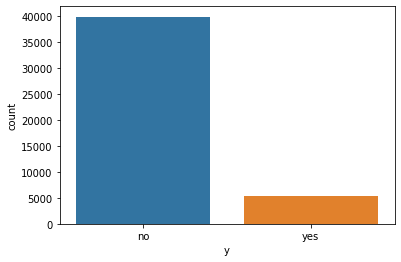

In [28]:
#total customer Deposit count based on Bank_results
sns.countplot(x='y',data=df)
plt.show()

In [29]:
df['y'].groupby(df['y']).count()

y
no     39922
yes     5289
Name: y, dtype: int64

given dataset seems to be imbalanced.

# **Feature Engineering**

Drop unwanted Features

Handle Missing Values

Handle Categorical Features

Handle Feature Scalling

Remove Outliers

As per Exploratory Data Analysis EDA,
no missing value found

no feature found with one value

9 categorical features

defaut features does not play imp role

it seems some outliers found (age, balance, duration, compaign, pdays and previous has some outliers)

In [30]:
df2=df.copy()

In [31]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [32]:
df2.shape

(45211, 17)

In [33]:
#default features does not play imp role
df2.groupby(['y','default']).size()

y    default
no   no         39159
     yes          763
yes  no          5237
     yes           52
dtype: int64

In [34]:
df2.drop(['default'],axis=1, inplace=True)

In [35]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       33570
      1           9
      2          35
      3           1
      4           1
              ...  
yes   804         1
      805         1
      828         1
      842         1
      854         1
Length: 914, dtype: int64

In [36]:
# drop pdays as it has -1 value for around 40%+ 
df2.drop(['pdays'],axis=1, inplace=True)

In [37]:
# remove outliers in feature age...
df2.groupby('age',sort=True)['age'].count()
# these can be ignored and values lies in between 18 to 95

age
18     12
19     35
20     50
21     79
22    129
     ... 
90      2
92      2
93      2
94      1
95      2
Name: age, Length: 77, dtype: int64

In [38]:
# remove outliers in feature balance...
df2.groupby(['y','balance'],sort=True)['balance'].count()
# these outlier should not be remove as balance goes high, client show interest on deposit

y    balance
no   -8019      1
     -6847      1
     -4057      1
     -3372      1
     -3313      1
               ..
yes   34646     1
      36252     1
      45248     1
      52587     2
      81204     2
Name: balance, Length: 9258, dtype: int64

In [39]:
# remove outliers in feature duration...
df2.groupby(['y','duration'],sort=True)['duration'].count()
# these outlier should not be remove as duration goes high, client show interest on deposit

y    duration
no   0            3
     1            2
     2            3
     3            4
     4           15
                 ..
yes  3094         1
     3102         1
     3183         1
     3253         1
     3881         1
Name: duration, Length: 2627, dtype: int64

In [40]:
# remove outliers in feature campaign...
df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
                 ...  
yes  20              1
     21              1
     24              1
     29              1
     32              1
Name: campaign, Length: 70, dtype: int64

In [41]:
df3 = df2[df2['campaign'] < 33]

In [42]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           14983
     2           11104
     3            4903
     4            3205
     5            1625
     6            1199
     7             688
     8             508
     9             306
     10            252
     11            185
     12            151
     13            127
     14             89
     15             80
     16             77
     17             63
     18             51
     19             44
     20             42
     21             34
     22             23
     23             22
     24             19
     25             22
     26             13
     27             10
     28             16
     29             15
     30              8
     31             12
     32              8
yes  1            2561
     2            1401
     3             618
     4             317
     5             139
     6              92
     7              47
     8              32
     9              21
     10             14
     11             

In [43]:
# remove outliers in feature previous...
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           33532
     1            2189
     2            1650
     3             848
     4             543
                 ...  
yes  26              1
     29              1
     30              1
     55              1
     58              1
Name: previous, Length: 66, dtype: int64

In [44]:
df4 = df3[df3['previous'] < 31]

# **scaling and label encoding**


In [45]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [46]:
bool_columns = ['housing', 'loan', 'y']
for col in  bool_columns:
    df4[col+'_new']=df4[col].apply(lambda x : 1 if x == 'yes' else 0)
    df4.drop(col, axis=1, inplace=True)

In [47]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45161 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45161 non-null  int64
 1   balance              45161 non-null  int64
 2   day                  45161 non-null  int64
 3   duration             45161 non-null  int64
 4   campaign             45161 non-null  int64
 5   previous             45161 non-null  int64
 6   job_blue-collar      45161 non-null  uint8
 7   job_entrepreneur     45161 non-null  uint8
 8   job_housemaid        45161 non-null  uint8
 9   job_management       45161 non-null  uint8
 10  job_retired          45161 non-null  uint8
 11  job_self-employed    45161 non-null  uint8
 12  job_services         45161 non-null  uint8
 13  job_student          45161 non-null  uint8
 14  job_technician       45161 non-null  uint8
 15  job_unemployed       45161 non-null  uint8
 16  job_unknown          4

In [48]:
df4.head().T

,0,1,2,3,4
age,58,44,33,47,33
balance,2143,29,2,1506,1
day,5,5,5,5,5
duration,261,151,76,92,198
campaign,1,1,1,1,1
previous,0,0,0,0,0
job_blue-collar,0,0,0,1,0
job_entrepreneur,0,0,1,0,0
job_housemaid,0,0,0,0,0
job_management,1,0,0,0,0


In [49]:
df.loc[11812]

age               56
job          unknown
marital      married
education    unknown
default           no
balance            0
housing           no
loan              no
contact      unknown
day               20
month            jun
duration         471
campaign           2
pdays             -1
previous           0
poutcome     unknown
y                 no
Name: 11812, dtype: object

# **Train Test Split**

In [50]:
X = df4.drop(['y_new'],axis=1)
y = df4['y_new']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(36128, 40)
(9033, 40)


# **Oversampling using SMOTE**


In [51]:
import imblearn
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

In [52]:
print ('original dataset length',len(X))
print ('Resample dataset length',len(X_train_sm))

original dataset length 45161
Resample dataset length 63848


# **Scaling on Data set**

In [53]:
# Transforming data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_sm = scaler.fit_transform(X_train_sm)
X_test = scaler.transform(X_test)

In [54]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

# **Implementing Various Machine learning Models**

# **1.Logistic Regression**

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
logreg = LogisticRegression()

logreg.fit(X_train_sm, y_train_sm)

logreg_prediction = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test,logreg_prediction)
print("Training accuracy Score    : ",logreg.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",logreg_accuracy )
print(classification_report(logreg_prediction,y_test))

Training accuracy Score    :  0.9296297456459091
Testing accuracy Score :  0.8749031329569357
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8016
           1       0.45      0.48      0.46      1017

    accuracy                           0.87      9033
   macro avg       0.69      0.70      0.70      9033
weighted avg       0.88      0.87      0.88      9033



**ROC AOC Curve for Logistic Regression**

In [56]:
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc

In [57]:
logreg_clf_probability = logreg.predict_proba(X_test)[:,1]

In [58]:
roc_socre=roc_auc_score(y_test, logreg_clf_probability)
roc_socre

0.8568162046957846

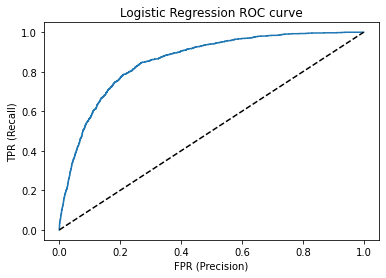

In [59]:
from sklearn.metrics import roc_curve
lg_fpr, lg_tpr, _ = roc_curve(y_test, logreg_clf_probability)

plt.title('Logistic Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(lg_fpr,lg_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **2.Random Forest Classifier**

In [60]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train_sm, y_train_sm)

rf_prediction = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test,rf_prediction)

print("Training accuracy Score    : ",rf_clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",rf_accuracy )
print(classification_report(rf_prediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8899590390789328
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      8054
           1       0.49      0.55      0.52       979

    accuracy                           0.89      9033
   macro avg       0.72      0.74      0.73      9033
weighted avg       0.90      0.89      0.89      9033



**Confusion Matrix for Random Forest Classifier**

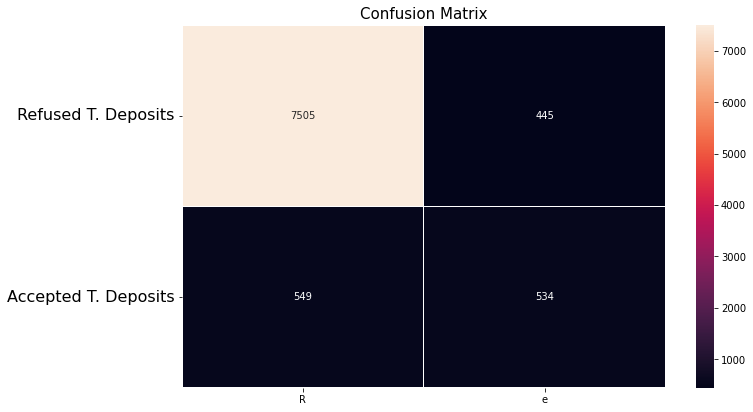

In [61]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,rf_prediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Random Forest Classifier**

In [62]:
rf_clf_probability = rf_clf.predict_proba(X_test)[:,1]

In [63]:
roc_socre=roc_auc_score(y_test, rf_clf_probability)
roc_socre

0.91675139520433

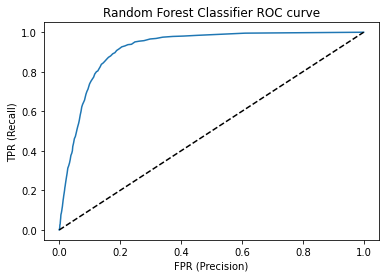

In [64]:
from sklearn.metrics import roc_curve
rfc_fpr, rfc_tpr, _ = roc_curve(y_test, rf_clf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(rfc_fpr,rfc_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Important Feature for Random Forest Classifier**

In [65]:
rf_clf.feature_importances_

array([0.03712905, 0.04372507, 0.04196274, 0.2423601 , 0.02280979,
       0.02097439, 0.02889949, 0.00310319, 0.00367684, 0.01360757,
       0.00396563, 0.00332359, 0.00716793, 0.0019501 , 0.01528486,
       0.00401154, 0.00068683, 0.0303492 , 0.01568959, 0.02351206,
       0.01281646, 0.00415534, 0.00630165, 0.05681463, 0.03328846,
       0.00121754, 0.01260555, 0.01045092, 0.033385  , 0.01575992,
       0.00225641, 0.04701169, 0.02450487, 0.00319086, 0.00203324,
       0.00808363, 0.0052793 , 0.06936602, 0.06526544, 0.02202351])

In [66]:
features = X.columns
importances = rf_clf.feature_importances_
indices = np.argsort(importances)

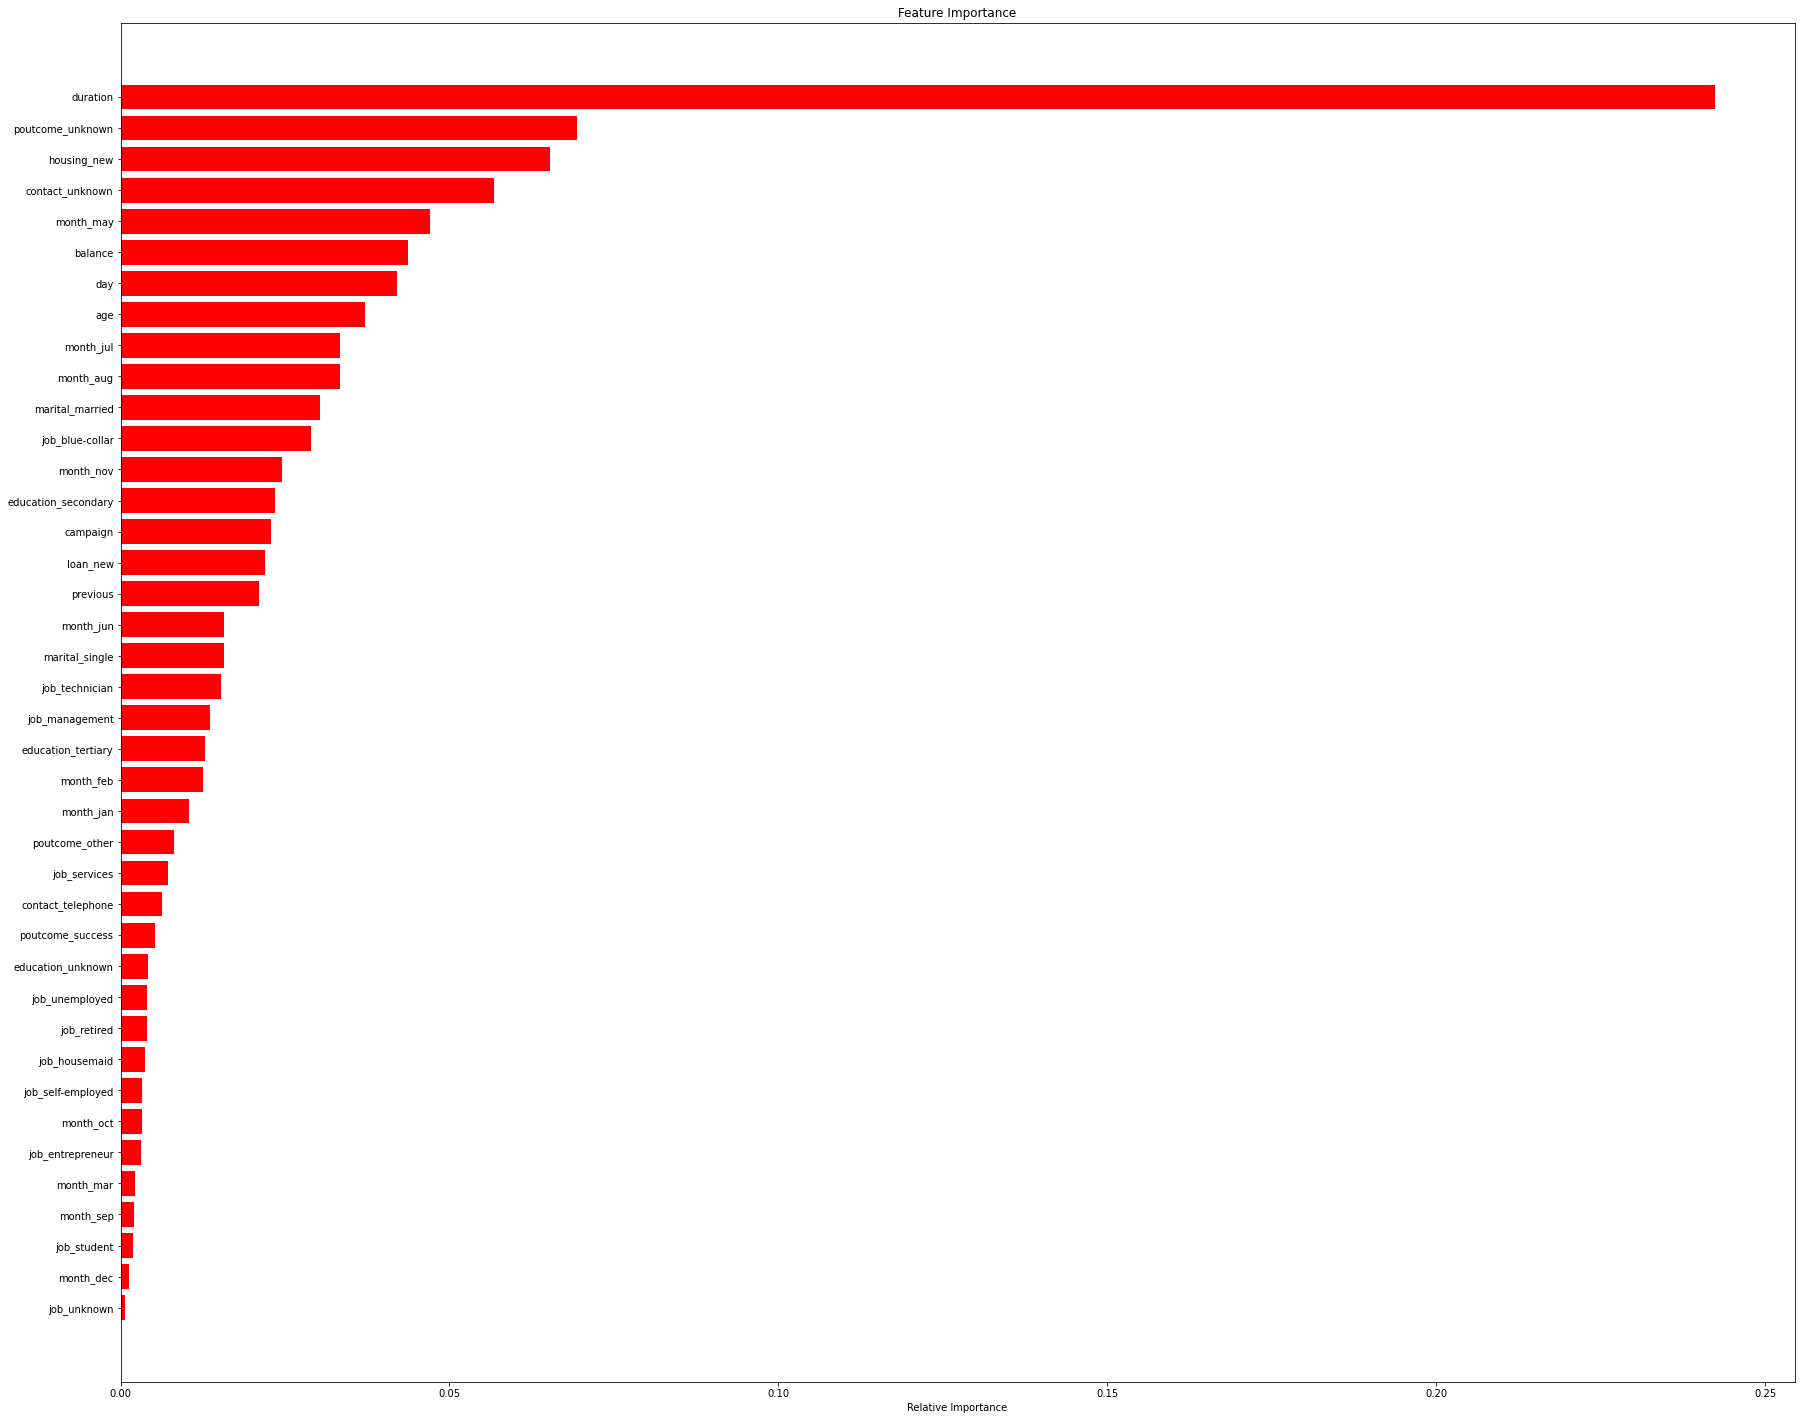

In [67]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Hyperparameter Tuning**


Creating Dictionary Of hyperparameters

In [68]:
#Hyperparameter Grid
param_dict = {
     "n_estimators":[50,100,200,250],
    "max_depth":[5,10,15],
     'min_samples_split':[50,100,150,200],'min_samples_leaf':[40,50,60]}

In [69]:
param_dict

{'max_depth': [5, 10, 15],
 'min_samples_leaf': [40, 50, 60],
 'min_samples_split': [50, 100, 150, 200],
 'n_estimators': [50, 100, 200, 250]}

In [70]:
#implementating RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
#Creating an instance of the RandomForestClassifier
rf_clf = RandomForestClassifier()
#random search
random_rf = RandomizedSearchCV(estimator=rf_clf,param_distributions=param_dict,cv=5,verbose=2,scoring='roc_auc',n_iter=5,random_state=0)
random_rf.fit(X_train_sm, y_train_sm)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   6.4s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   9.2s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   6.7s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   6.6s
[CV] END max_depth=5, min_samples_leaf=40, min_samples_split=100, n_estimators=250; total time=   7.3s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=60, min_samples_split=150, n_estimators=100; total time=   3.8s
[CV] END 

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': [5, 10, 15],
                                        'min_samples_leaf': [40, 50, 60],
                                        'min_samples_split': [50, 100, 150,
                                                              200],
                                        'n_estimators': [50, 100, 200, 250]},
                   random_state=0, scoring='roc_auc', verbose=2)

In [71]:
#Best estimator for random forest
random_rf.best_estimator_

RandomForestClassifier(max_depth=15, min_samples_leaf=40, min_samples_split=50)

In [72]:
random_rf.best_params_

{'max_depth': 15,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [73]:
y_pred = random_rf.predict(X_test)

In [74]:
print(f'Train Accuracy={accuracy_score(y_train,random_rf.predict(X_train))}')
print(f'Test Accuracy={accuracy_score(y_test,y_pred)}')
print(classification_report(y_pred,y_test))

Train Accuracy=0.6233115589016829
Test Accuracy=0.8773386471825528
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      7860
           1       0.53      0.49      0.51      1173

    accuracy                           0.88      9033
   macro avg       0.73      0.71      0.72      9033
weighted avg       0.87      0.88      0.88      9033



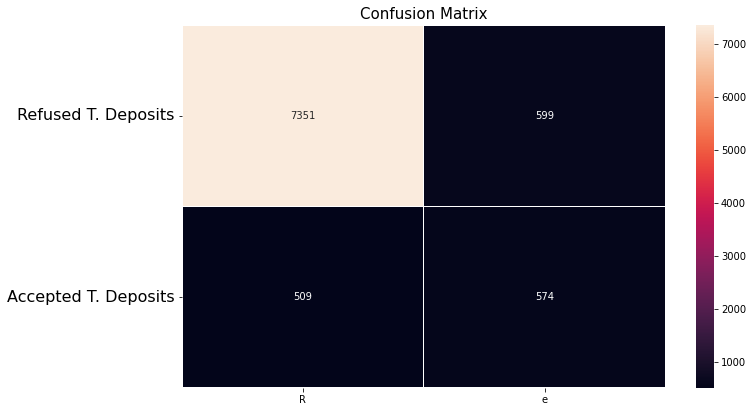

In [75]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,y_pred)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Random Forest Classifier After Hyperparameric Tuning**

In [76]:
random_rf_probability = random_rf.predict_proba(X_test)[:,1]

In [77]:
roc_socre=roc_auc_score(y_test, random_rf_probability)
roc_socre

0.9000447162261828

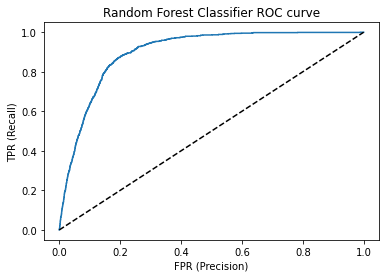

In [78]:
from sklearn.metrics import roc_curve
rrf_fpr, rrf_tpr, _ = roc_curve(y_test, random_rf_probability)

plt.title('Random Forest Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(rrf_fpr,rrf_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **3.Decision Tree Classifier**

In [79]:
from sklearn.tree import DecisionTreeClassifier

modeldt = DecisionTreeClassifier()

modeldt.fit(X_train_sm, y_train_sm)
modelprediction = modeldt.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)


print("Training accuracy Score    : ",modeldt.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  1.0
Testing accuracy Score :  0.8616185099081147
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      7722
           1       0.53      0.44      0.48      1311

    accuracy                           0.86      9033
   macro avg       0.72      0.69      0.70      9033
weighted avg       0.85      0.86      0.86      9033



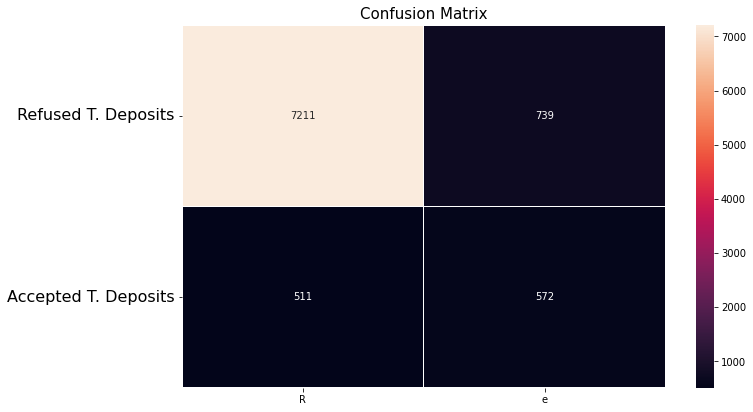

In [80]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=15)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("Refused T. Deposits', 'Accepted T. Deposits")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Decision Tree Classifier**

In [81]:
modeldt_probability = modeldt.predict_proba(X_test)[:,1]

In [82]:
roc_socre=roc_auc_score(y_test, modeldt_probability)
roc_socre

0.7176032683496227

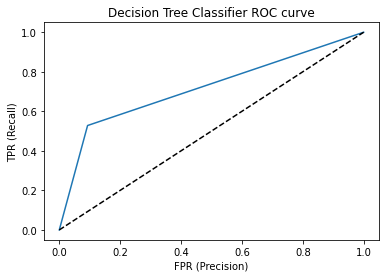

In [83]:
from sklearn.metrics import roc_curve
dt_fpr, dt_tpr, _ = roc_curve(y_test, modeldt_probability)

plt.title('Decision Tree Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(dt_fpr,dt_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Important Feature for Decision Tree Classifier**

In [84]:
modeldt.feature_importances_

array([0.02974594, 0.04148271, 0.04108487, 0.33659307, 0.01878732,
       0.01515793, 0.00613526, 0.00144247, 0.00167192, 0.0049755 ,
       0.00209017, 0.00124241, 0.0031843 , 0.00090947, 0.00460491,
       0.00162851, 0.00067377, 0.0118605 , 0.00773714, 0.00602226,
       0.00596524, 0.00197454, 0.00531984, 0.10253819, 0.03138769,
       0.00178666, 0.01925901, 0.0161813 , 0.03387512, 0.00565939,
       0.00192868, 0.01492486, 0.02719575, 0.00424335, 0.00278484,
       0.00868855, 0.00630858, 0.07768575, 0.09143679, 0.00382548])

In [85]:
features = X.columns
importances = modeldt.feature_importances_
indices = np.argsort(importances)

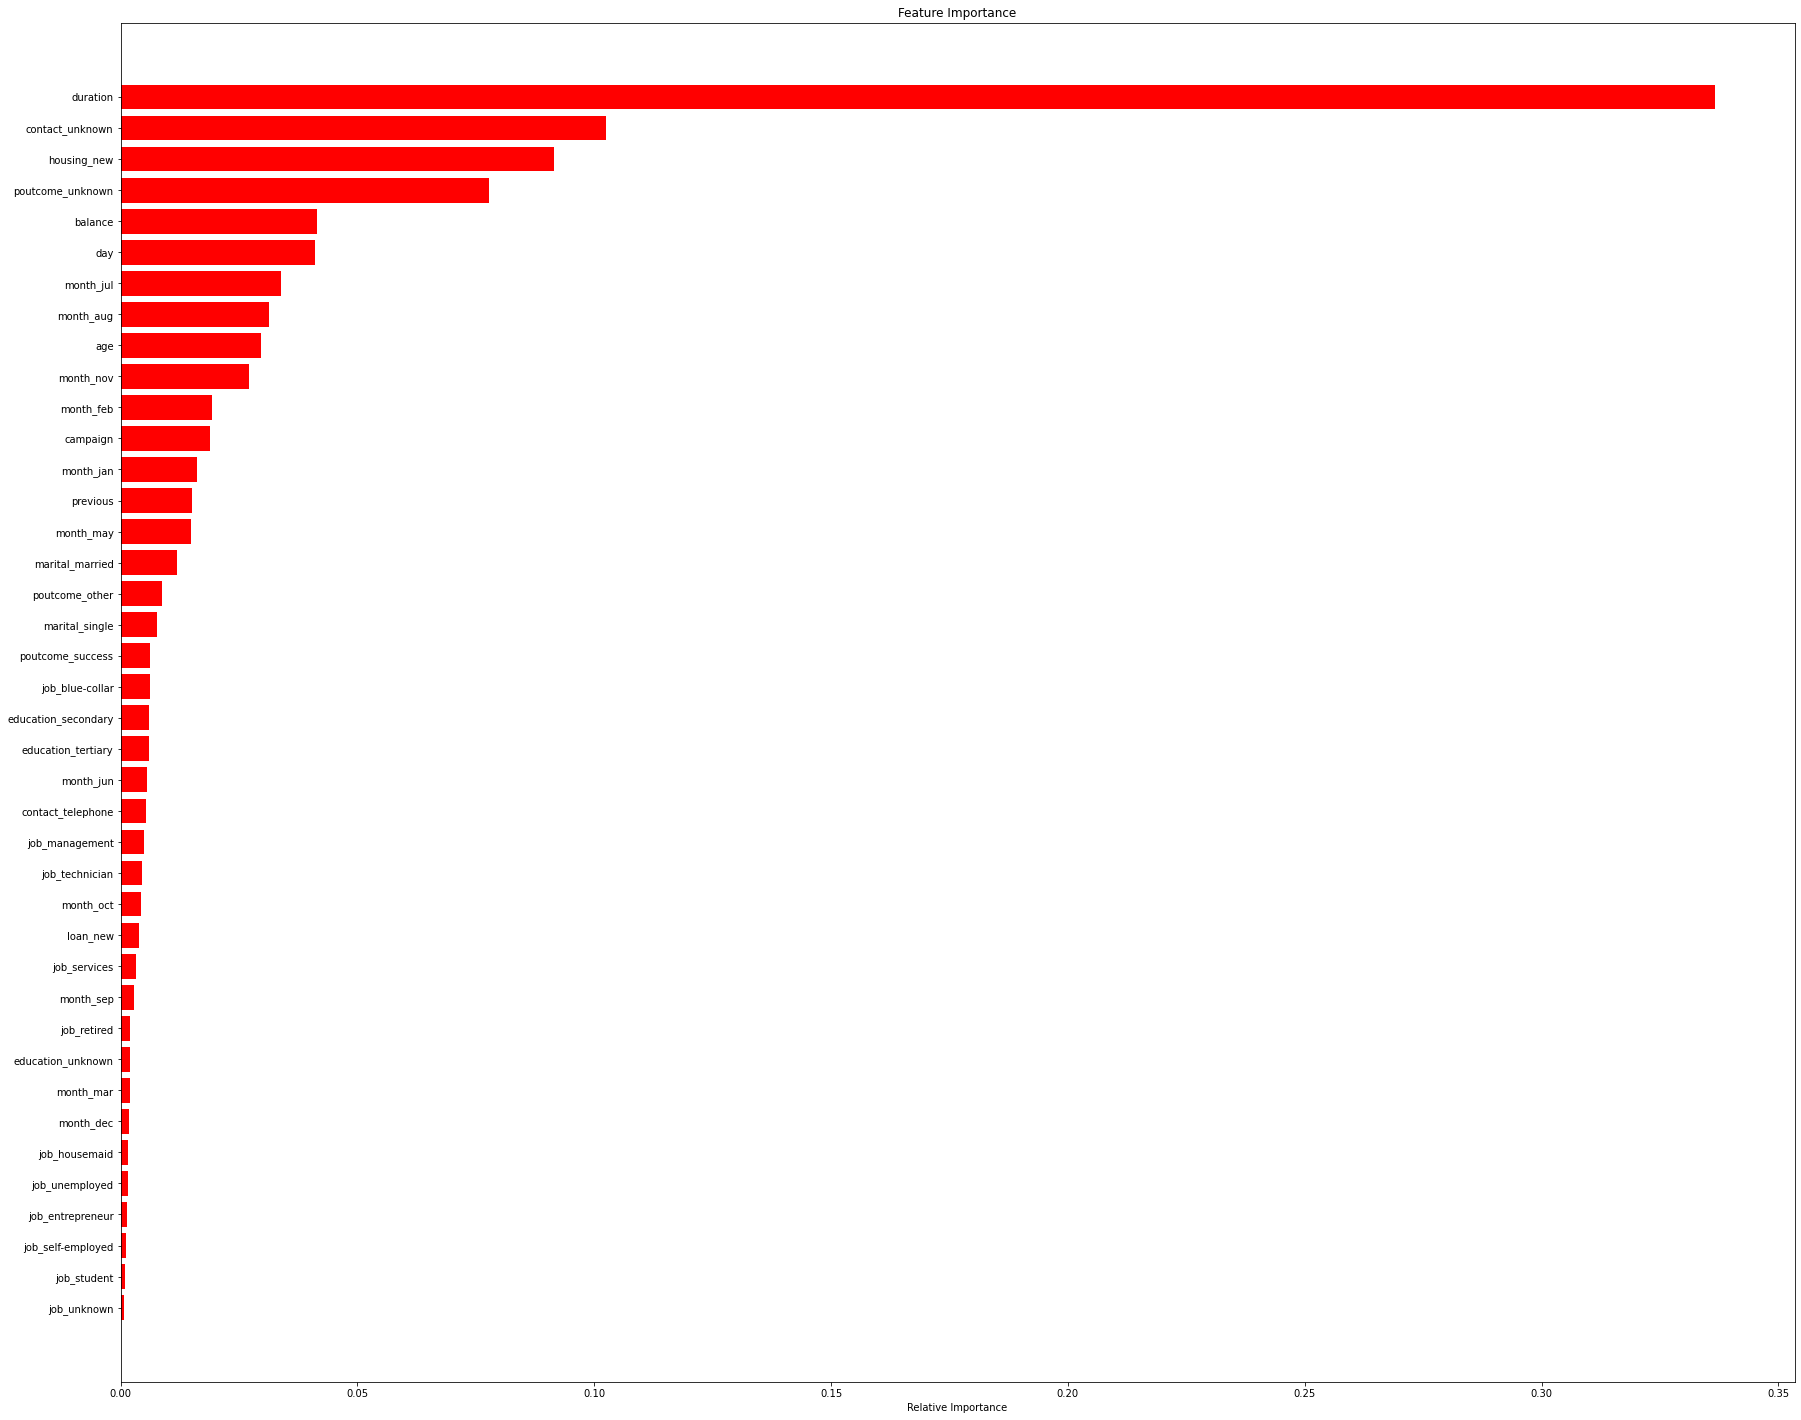

In [86]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# **4.Gradient Boosting Classifier**

In [87]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

clf.fit(X_train_sm, y_train_sm)
modelprediction = clf.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  0.9319007643152487
Testing accuracy Score :  0.8754566589173032
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      7957
           1       0.48      0.48      0.48      1076

    accuracy                           0.88      9033
   macro avg       0.70      0.70      0.70      9033
weighted avg       0.88      0.88      0.88      9033



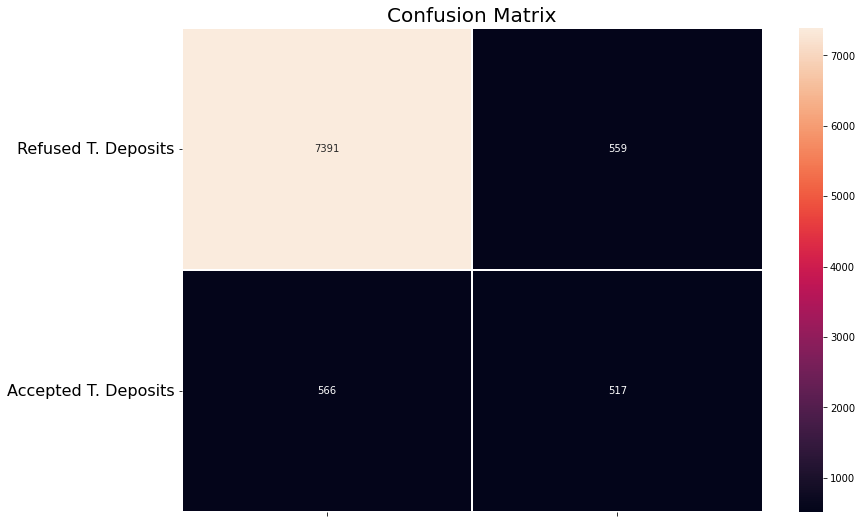

In [88]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, modelprediction)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for Gradient Boosting Classifier**

In [89]:
grb_probability = clf.predict_proba(X_test)[:,1]

In [90]:
roc_socre=roc_auc_score(y_test, grb_probability)
roc_socre

0.8761096883220962

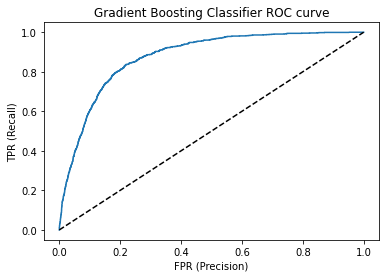

In [91]:
from sklearn.metrics import roc_curve
gb_fpr, gb_tpr, _ = roc_curve(y_test, grb_probability)

plt.title('Gradient Boosting Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(gb_fpr,gb_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **5.K Neighbors Classifier**

In [92]:
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier()

model_KNN.fit(X_train_sm, y_train_sm)
modelprediction = model_KNN.predict(X_test)
model_accuracy = accuracy_score(y_test, modelprediction)

print("Training accuracy Score    : ",model_KNN.score(X_train_sm, y_train_sm))
print("Validation accuracy Score : ",model_accuracy )
print(classification_report(modelprediction,y_test))

Training accuracy Score    :  0.9422221526124546
Validation accuracy Score :  0.8641647293258053
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      8115
           1       0.36      0.42      0.39       918

    accuracy                           0.86      9033
   macro avg       0.65      0.67      0.66      9033
weighted avg       0.87      0.86      0.87      9033



**ROC AOC Curve for K Neighbors Classifier**

In [93]:
model_KNN_probability = model_KNN.predict_proba(X_test)[:,1]

In [94]:
roc_socre=roc_auc_score(y_test, model_KNN_probability)
roc_socre

0.7573410686597328

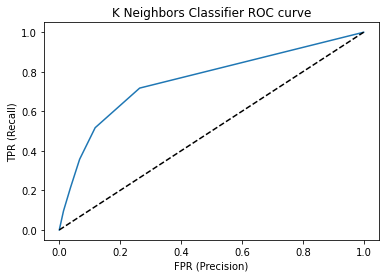

In [95]:
from sklearn.metrics import roc_curve
KNN_fpr, KNN_tpr, _ = roc_curve(y_test, model_KNN_probability)

plt.title('K Neighbors Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(KNN_fpr,KNN_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

# **6.XG Boost**

In [96]:
#takes huge amount of time to execute
import xgboost as xgb

xgboost_clf = xgb.XGBClassifier()

xgboost_clf.fit(X_train_sm, y_train_sm)
xgb_prediction = xgboost_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test,xgb_prediction)

print("Training accuracy Score    : ",xgboost_clf.score(X_train_sm, y_train_sm))
print("Testing accuracy Score : ",xgb_accuracy )
print(classification_report(xgb_prediction,y_test))

Training accuracy Score    :  0.9326682120035084
Testing accuracy Score :  0.87977416140817
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      7690
           1       0.62      0.50      0.55      1343

    accuracy                           0.88      9033
   macro avg       0.77      0.72      0.74      9033
weighted avg       0.87      0.88      0.87      9033



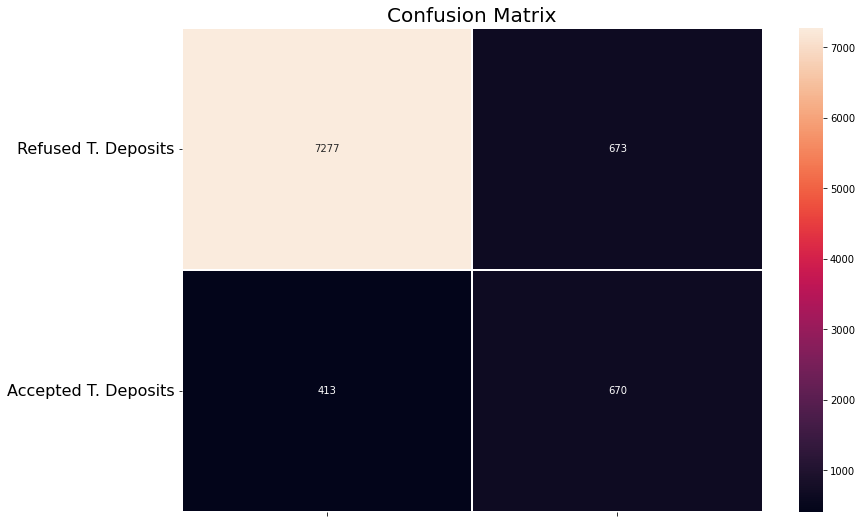

In [97]:
#confusion matrix
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,xgb_prediction)
f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(conf_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Refused T. Deposits', 'Accepted T. Deposits'], fontsize=16, rotation=360)
plt.show()

**ROC AOC Curve for XGB Classifier**

In [98]:
Xgb_probability = xgboost_clf.predict_proba(X_test)[:,1]

In [99]:
roc_socre=roc_auc_score(y_test, Xgb_probability)
roc_socre

0.9029914574586084

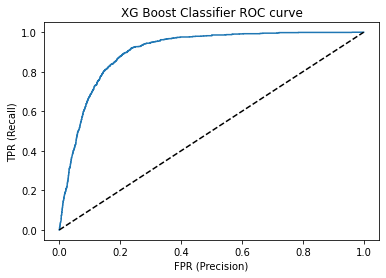

In [100]:
from sklearn.metrics import roc_curve
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, Xgb_probability)

plt.title('XG Boost Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(xgb_fpr,xgb_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**Important Feature for XG Boost Classifier**

In [101]:
xgboost_clf.feature_importances_

array([0.00316709, 0.00085785, 0.0048504 , 0.04846628, 0.00935312,
       0.004969  , 0.03943865, 0.00703414, 0.01095445, 0.0208434 ,
       0.00833604, 0.00685511, 0.01493151, 0.        , 0.02357626,
       0.00725607, 0.        , 0.0333957 , 0.06082058, 0.03312648,
       0.06056095, 0.02081247, 0.01263772, 0.06827929, 0.04127818,
       0.        , 0.01979966, 0.02005263, 0.0380737 , 0.01610789,
       0.        , 0.03756259, 0.03341983, 0.00180191, 0.0014466 ,
       0.02166421, 0.00221986, 0.14043052, 0.08305068, 0.04256917],
      dtype=float32)

In [102]:
features = X.columns
importances = xgboost_clf.feature_importances_
indices = np.argsort(importances)

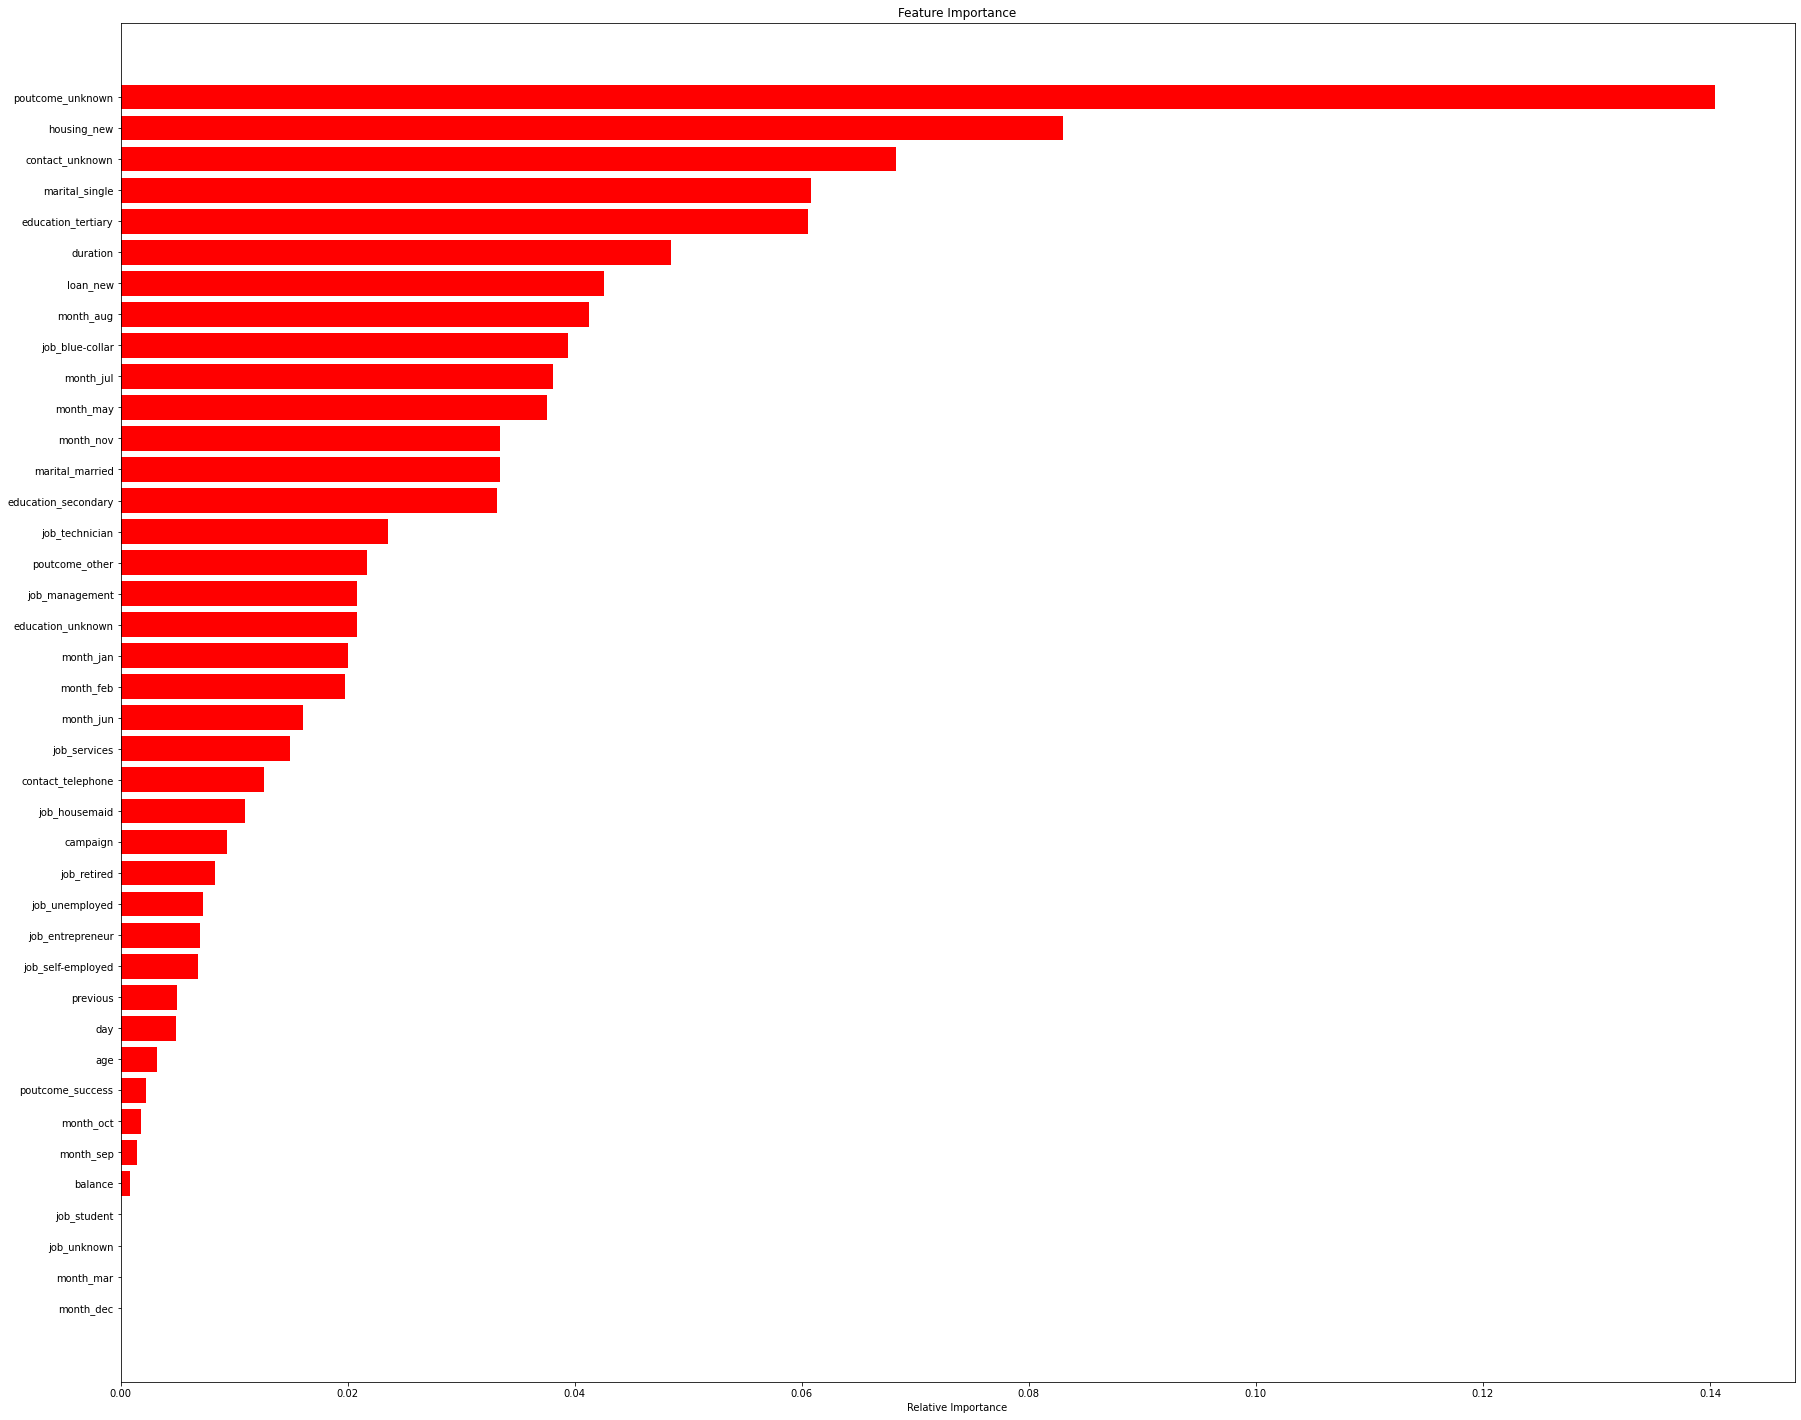

In [103]:
plt.figure(figsize=(30,25))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [104]:
#roc_auc_score for different classifiers
from sklearn.metrics import roc_auc_score

print('Random Forest Classifier Score: ', roc_auc_score(y_test, rf_clf_probability))
print('Gradient Boosting Classifier Score: ', roc_auc_score(y_test, grb_probability))
print('XGB Classifier: ', roc_auc_score(y_test, Xgb_probability))

Random Forest Classifier Score:  0.91675139520433
Gradient Boosting Classifier Score:  0.8761096883220962
XGB Classifier:  0.9029914574586084


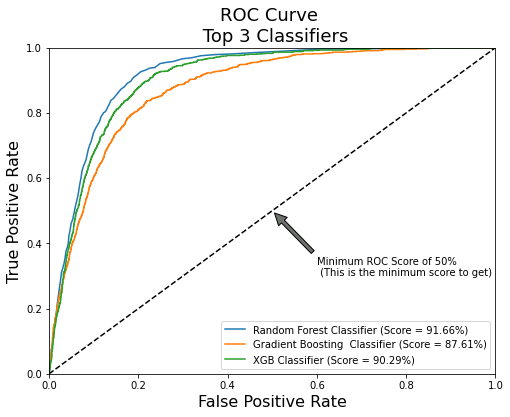

In [105]:
#roc curves
def graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Top 3 Classifiers', fontsize=18)
    plt.plot(rfc_fpr, rfc_tpr, label='Random Forest Classifier (Score = 91.66%)')
    plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting  Classifier (Score = 87.61%)')
    plt.plot(xgb_fpr, xgb_tpr, label='XGB Classifier (Score = 90.29%)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rfc_fpr, rfc_tpr, gb_fpr, gb_tpr, xgb_fpr, xgb_tpr)
plt.show()

# **7.Naive Byes Classifier**

In [106]:
from sklearn.naive_bayes import MultinomialNB

naiveByes_clf = MultinomialNB()

naiveByes_clf.fit(X_train_sm,y_train_sm)

NB_prediction = naiveByes_clf.predict(X_test)
NB_accuracy = accuracy_score(y_test,NB_prediction)
print("training accuracy Score    : ",naiveByes_clf.score(X_train_sm,y_train_sm))
print("Testing accuracy Score : ",NB_accuracy )
print(classification_report(NB_prediction,y_test))

training accuracy Score    :  0.8443960656559328
Testing accuracy Score :  0.8071515554079486
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      7296
           1       0.50      0.31      0.38      1737

    accuracy                           0.81      9033
   macro avg       0.67      0.62      0.63      9033
weighted avg       0.78      0.81      0.79      9033



**ROC AOC Curve for Naive Byes Classifier**

In [107]:
naiveByes_clf_probability = naiveByes_clf.predict_proba(X_test)[:,1]

In [108]:
roc_socre=roc_auc_score(y_test, naiveByes_clf_probability)
roc_socre

0.7536321770994848

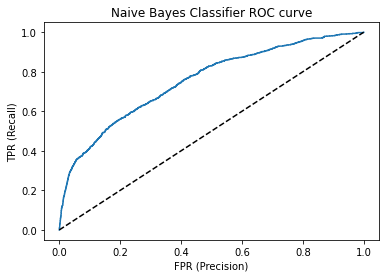

In [109]:
from sklearn.metrics import roc_curve
na_fpr, na_tpr, _ = roc_curve(y_test, naiveByes_clf_probability)

plt.title('Naive Bayes Classifier ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(na_fpr,na_tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

**After implementating all the ML models We get maximum accuracy with Gradient Boosting Classifier, Random Forest Classifier and XG boost**

# **Conclusion**

Months of Marketing Activity: We saw that the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December.

Campaign Calls: A policy should be implemented that states that no more than 3 calls should be applied to the same potential client in order to save time and effort in getting new potential clients. Remember, the more we call the same potential client, the more likely he or she will decline to open a term deposit.

Age Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. The youngest category had a 60% chance of subscribing to a term deposit while the eldest category had a 76% chance of subscribing to a term deposit. It will be great if for the next campaign the bank addressed these two categories and therefore, increased the likelihood of more term deposits subscriptions.

Occupation: Not surprisingly, potential clients that were students or retired were the most likely to subscribe to a term deposit. Retired individuals tend to have more term deposits in order to gain some cash through interest payments. Remember, term deposits are short-term loans in which the individual (in this case the retired person) agrees not to withdraw the cash from the bank until a certain date agreed between the individual and the financial institution.

